IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\pet_adoption_data.csv')

In [4]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


CHECKING FOR MISSING VALUES

In [6]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

CHECKING THE NUMBER OF EACH PET

In [8]:
df['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

CHECKING THE NUMBER OF BREED TYPES

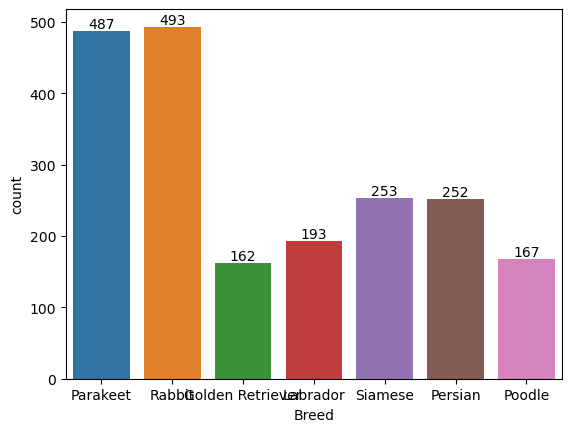

In [10]:
ax=sns.countplot(df, x='Breed', hue='Breed')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

GROUPING THE NUMBER OF PETS BASED ON THEIR COLOR

In [12]:
df.groupby('PetType')['Color'].value_counts()

PetType  Color 
Bird     Orange    112
         Gray       98
         White      97
         Brown      92
         Black      88
Cat      Black     114
         Orange    108
         White     100
         Brown      97
         Gray       86
Dog      Gray      114
         White     113
         Black     108
         Orange     98
         Brown      89
Rabbit   White     110
         Brown     105
         Gray      102
         Orange     91
         Black      85
Name: count, dtype: int64

GROUPING THE NUMBER OF PETS BASED ON THEIR SIZE

In [14]:
df.groupby('PetType')['Size'].value_counts()

PetType  Size  
Bird     Medium    179
         Small     158
         Large     150
Cat      Medium    184
         Small     161
         Large     160
Dog      Medium    179
         Large     175
         Small     168
Rabbit   Small     176
         Medium    172
         Large     145
Name: count, dtype: int64

NUMBER OF PET BASED ON PREVIOUS OWNER

In [16]:
df.groupby('PetType')['PreviousOwner'].value_counts()

PetType  PreviousOwner
Bird     0                340
         1                147
Cat      0                341
         1                164
Dog      0                372
         1                150
Rabbit   0                348
         1                145
Name: count, dtype: int64

TOTAL WEIGHT OF TYPE OF PET FROM HEAVIEST TO LEAST HEAVY

In [18]:
df.groupby('PetType')['WeightKg'].sum().sort_values(ascending=False)

PetType
Dog       8175.475960
Cat       7902.151434
Rabbit    7747.955081
Bird      7695.910811
Name: WeightKg, dtype: float64

PET ADOPTION FEE

In [20]:
df.groupby('PetType')['AdoptionFee'].value_counts()

PetType  AdoptionFee
Bird     419            5
         88             4
         213            4
         290            4
         366            4
                       ..
Rabbit   492            1
         493            1
         497            1
         498            1
         499            1
Name: count, Length: 1289, dtype: int64

In [21]:
df.groupby('PetType')['AdoptionFee'].sum()

PetType
Bird      127495
Cat       124868
Dog       129208
Rabbit    118457
Name: AdoptionFee, dtype: int64

TOTAL AGE MONTH FOR THE PETS

In [23]:
df.groupby('PetType')['AgeMonths'].sum()

PetType
Bird      43926
Cat       46145
Dog       48519
Rabbit    46615
Name: AgeMonths, dtype: int64

NUMBER FOR ADOPTION LIKELIHOOD

In [25]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

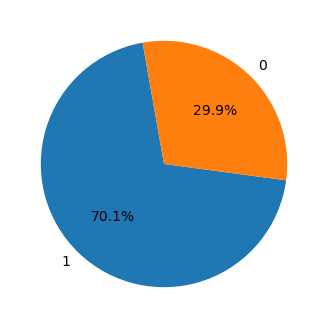

In [26]:
plt.figure(figsize=(5,4))
count=df['Vaccinated'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

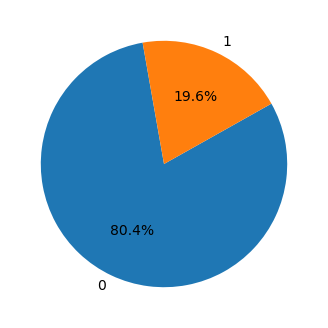

In [27]:
plt.figure(figsize=(5,4))
count=df['HealthCondition'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

ENCODING COLUMNS IN THE DATASET

In [29]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['PetType']=enco.fit_transform(df['PetType'])
df['Breed']=enco.fit_transform(df['Breed'])
df['Color']=enco.fit_transform(df['Color'])
df['Size']=enco.fit_transform(df['Size'])

SPLIT THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLE

In [31]:
x=df.drop(['PetID','AdoptionLikelihood'], axis=1)
y=df['AdoptionLikelihood']

VISUALIZING THE COLUMN DISTRIBUTION FOR THE DATASET

In [33]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

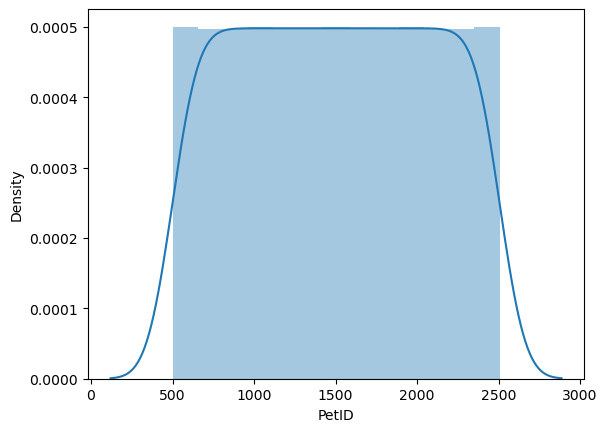

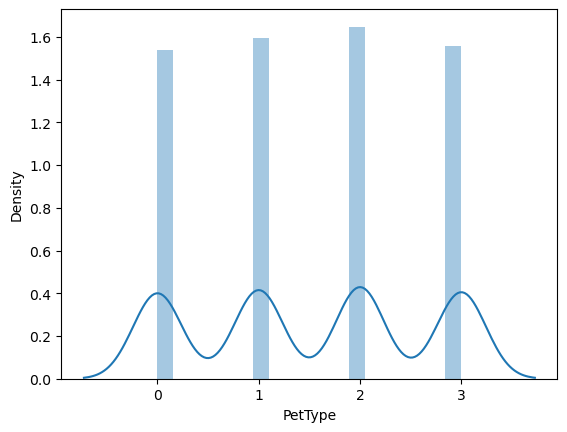

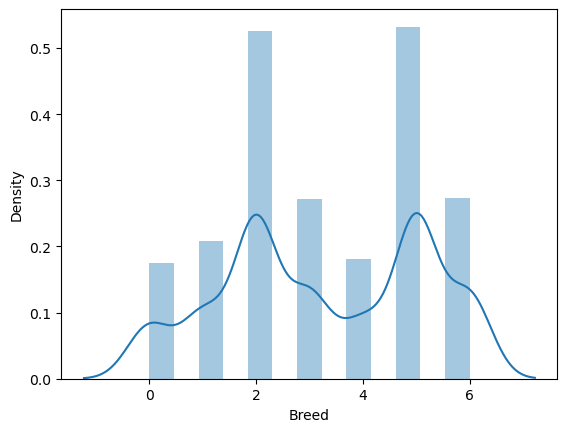

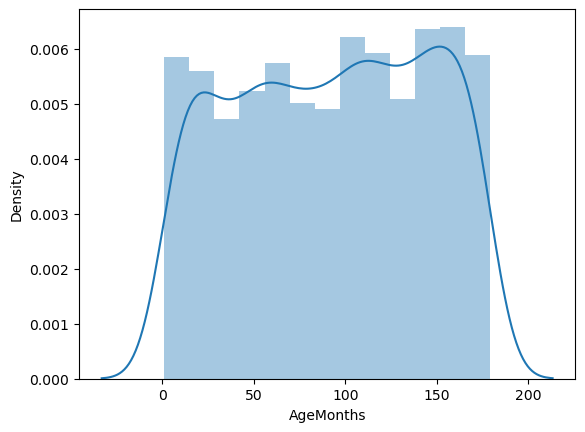

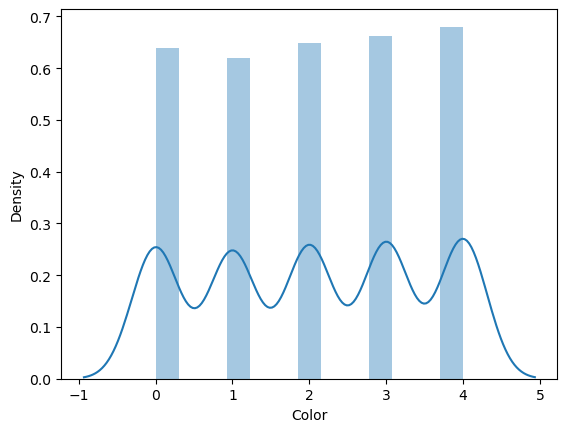

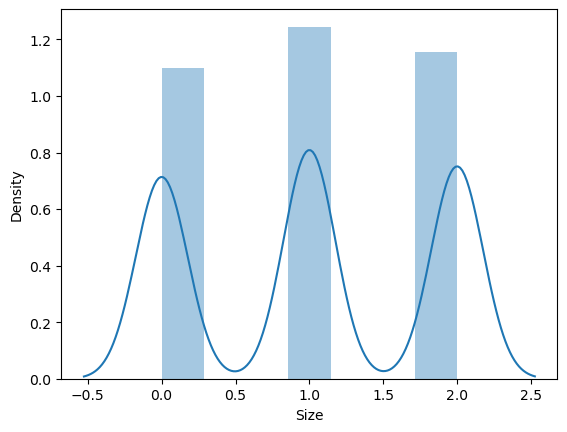

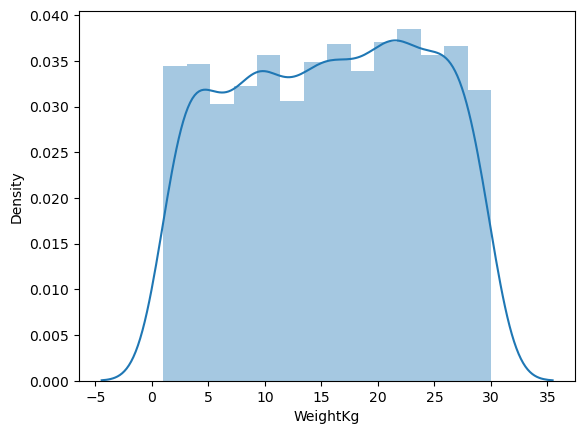

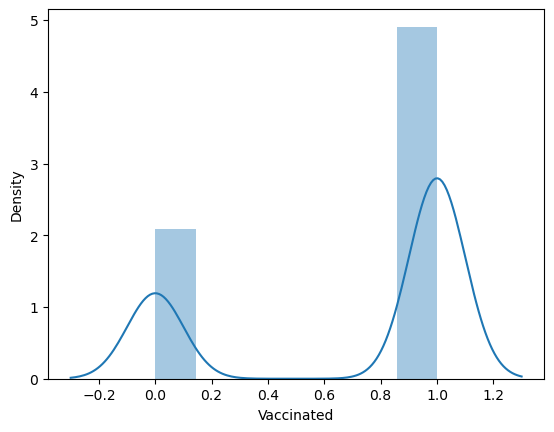

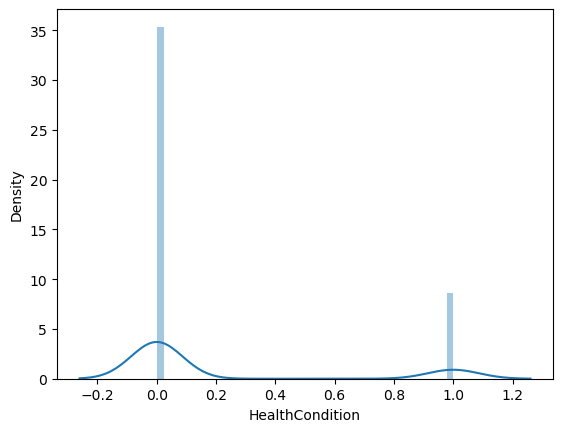

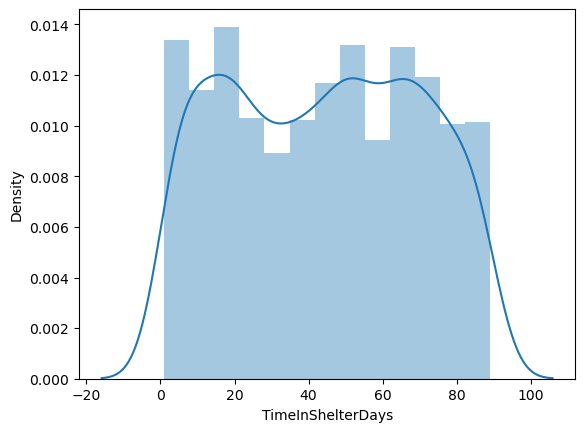

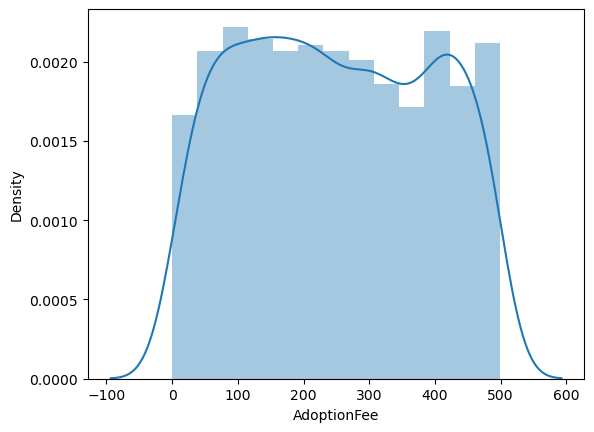

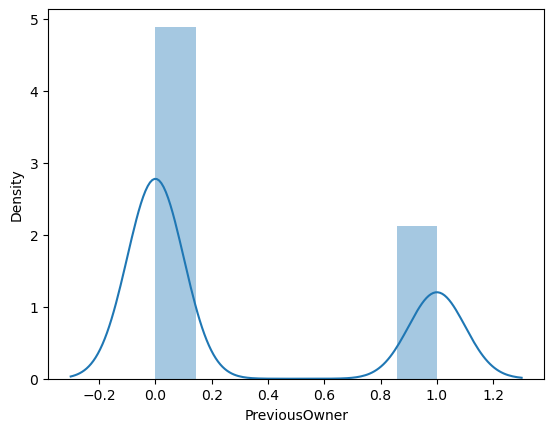

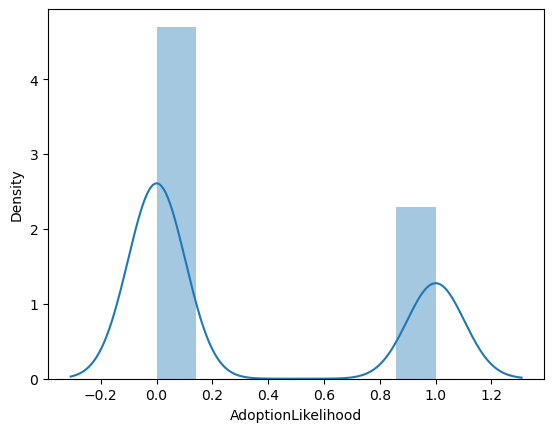

In [34]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

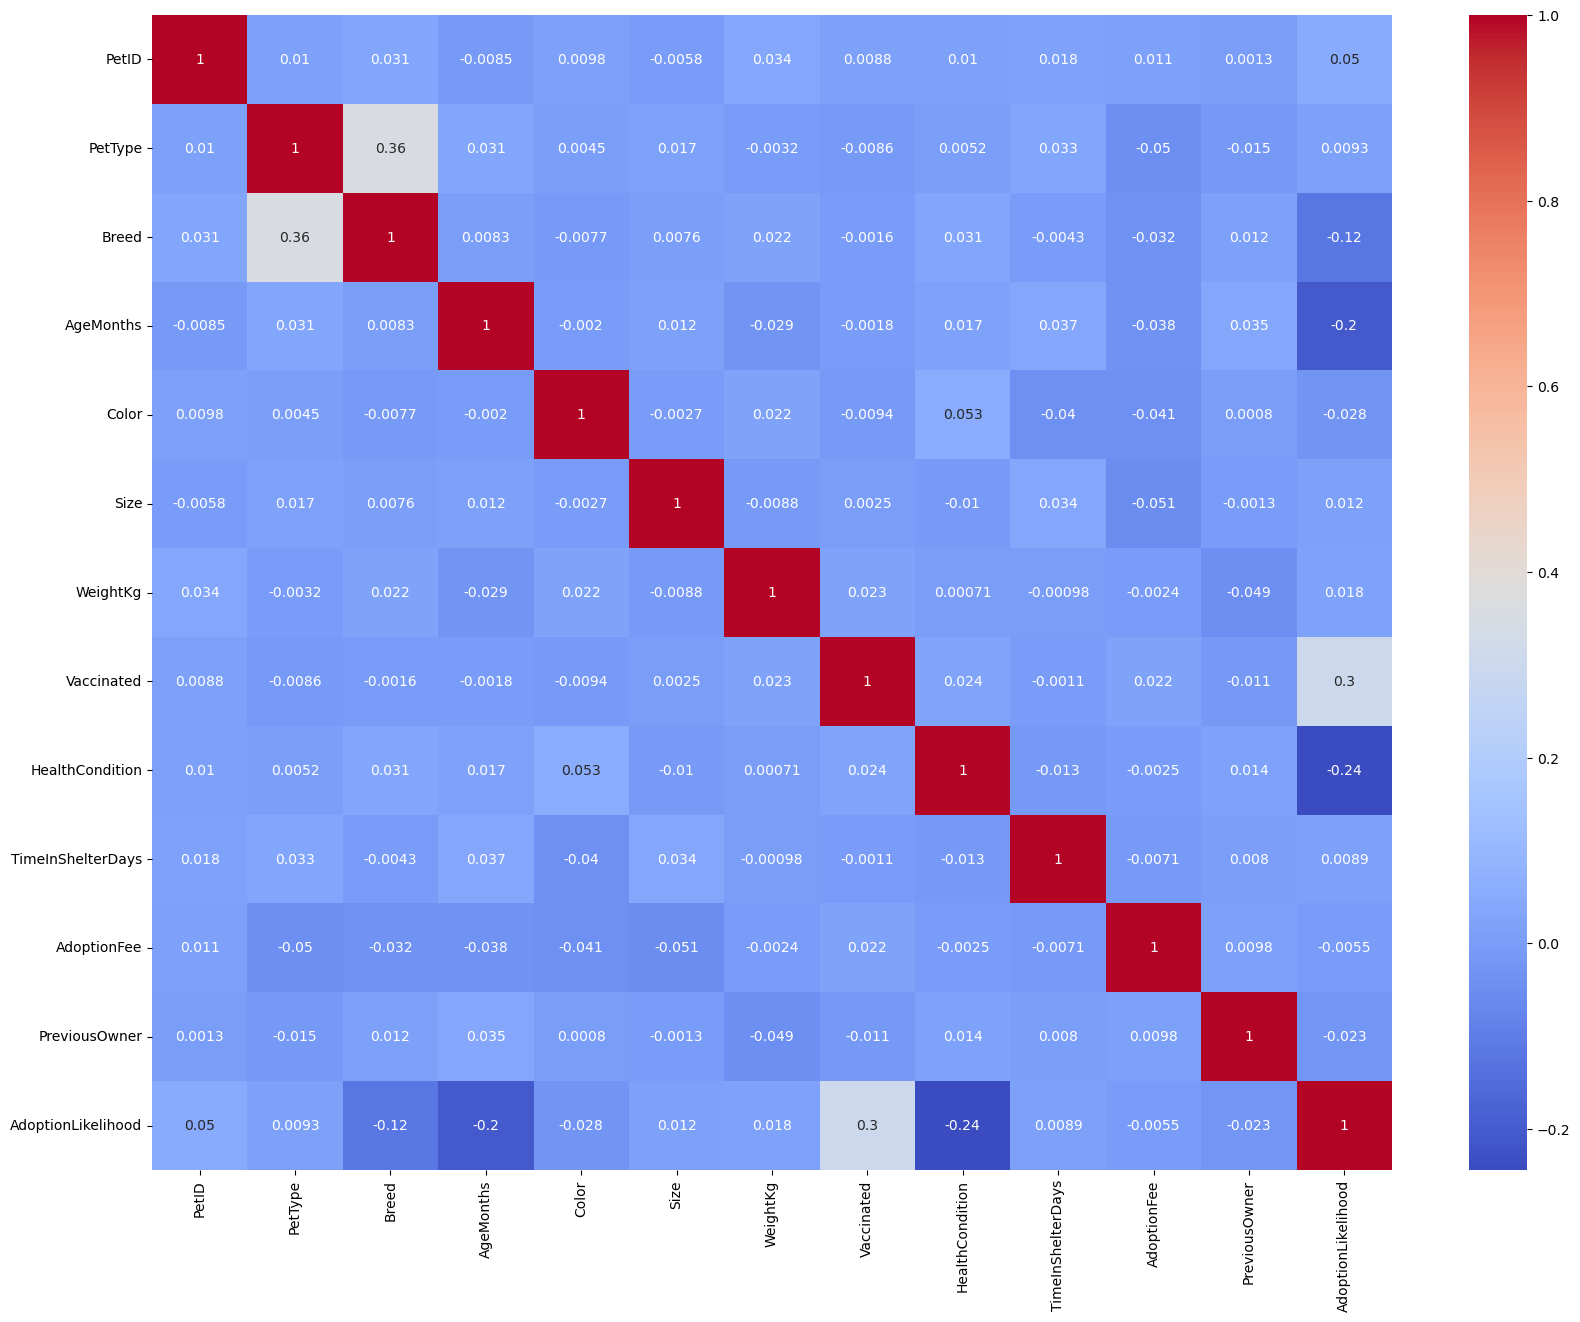

In [35]:
#FINDING CORRELATION
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

FEATURE SCALING

In [37]:
from sklearn.preprocessing import StandardScaler
scala=StandardScaler()
x=scala.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

LOGISTIC REGRESSION AND ITS MODEL EVALUATION

In [40]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
yhat_train_lreg=lreg.predict(x_train)
yhat_test_lreg=lreg.predict(x_test)

In [43]:
print(classification_report(y_train,yhat_train_lreg))
print()
print(classification_report(y_test,yhat_test_lreg))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1087
           1       0.63      0.52      0.57       518

    accuracy                           0.75      1605
   macro avg       0.71      0.69      0.69      1605
weighted avg       0.74      0.75      0.74      1605


              precision    recall  f1-score   support

           0       0.75      0.85      0.79       261
           1       0.62      0.47      0.53       141

    accuracy                           0.71       402
   macro avg       0.68      0.66      0.66       402
weighted avg       0.70      0.71      0.70       402



In [44]:
print(confusion_matrix(y_train,yhat_train_lreg))
print()
print(confusion_matrix(y_test,yhat_test_lreg))

[[931 156]
 [251 267]]

[[221  40]
 [ 75  66]]


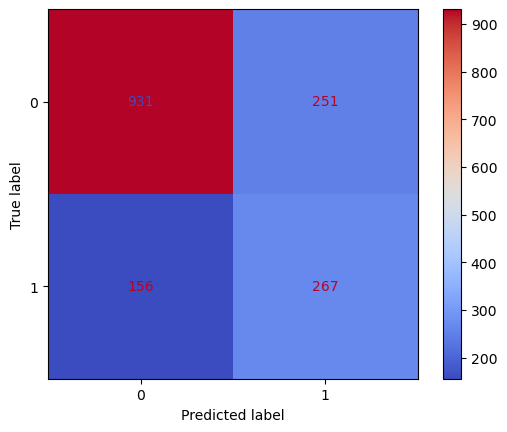

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

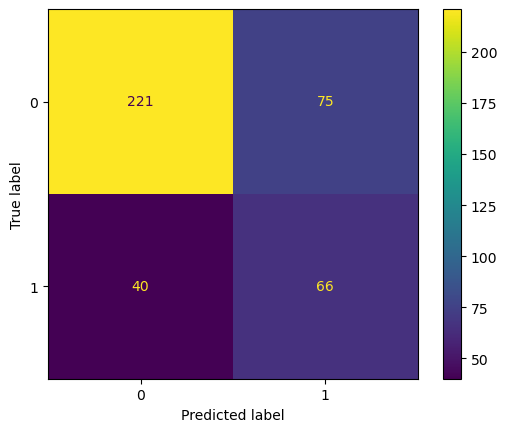

In [46]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg,y_test))
c_matrix.plot(cmap=plt.cm.viridis)

In [47]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lreg,x,y,cv=3)
np.mean(scores)

0.7324364723467861

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_train,yhat_train_lreg))
print()
print('Accuracy: ', accuracy_score(y_test,yhat_test_lreg))

Accuracy:  0.746417445482866

Accuracy:  0.7139303482587065


RANDOM FOREST AND ITS MODEL EVALUATION

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
yhat1_train_rfc=rfc.predict(x_train)
yhat1_test_rfc=rfc.predict(x_test)

In [52]:
print(classification_report(y_train, yhat1_train_rfc))
print()
print(classification_report(y_test,yhat1_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1087
           1       1.00      1.00      1.00       518

    accuracy                           1.00      1605
   macro avg       1.00      1.00      1.00      1605
weighted avg       1.00      1.00      1.00      1605


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       261
           1       0.92      0.84      0.88       141

    accuracy                           0.92       402
   macro avg       0.92      0.90      0.91       402
weighted avg       0.92      0.92      0.92       402



In [53]:
print(confusion_matrix(y_train, yhat1_train_rfc))
print()
print(confusion_matrix(y_test, yhat1_test_rfc))

[[1087    0]
 [   0  518]]

[[250  11]
 [ 22 119]]


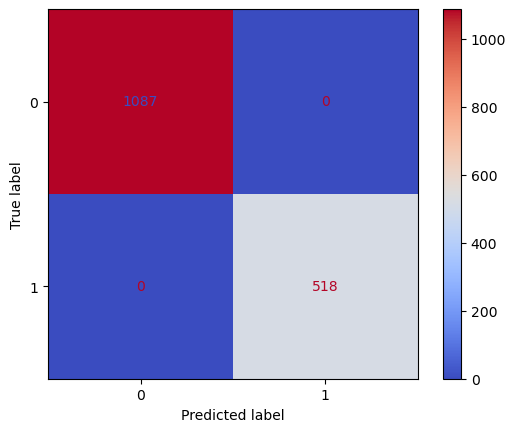

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_train_rfc,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

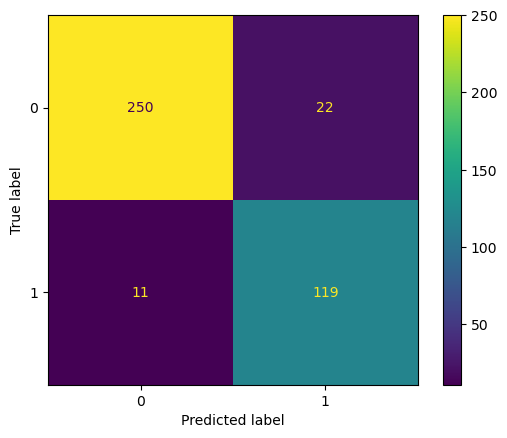

In [55]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_test_rfc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(rfc,x,y,cv=3)
np.mean(scores)

0.922272047832586

SUPPORT VENDOR MACHINE AND ITS MODEL EVALUATION

In [58]:
from sklearn import svm
s2=svm.SVC(kernel='linear')
s2.fit(x_train,y_train)

SVC(kernel='linear')

In [59]:
yhat2_train_s2=s2.predict(x_train)
yhat2_test_s2=s2.predict(x_test)

In [60]:
print(classification_report(y_train, yhat2_train_s2))
print()
print(classification_report(y_test, yhat2_test_s2))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1087
           1       0.64      0.50      0.56       518

    accuracy                           0.75      1605
   macro avg       0.71      0.68      0.69      1605
weighted avg       0.74      0.75      0.74      1605


              precision    recall  f1-score   support

           0       0.73      0.84      0.78       261
           1       0.60      0.43      0.50       141

    accuracy                           0.70       402
   macro avg       0.67      0.64      0.64       402
weighted avg       0.69      0.70      0.69       402



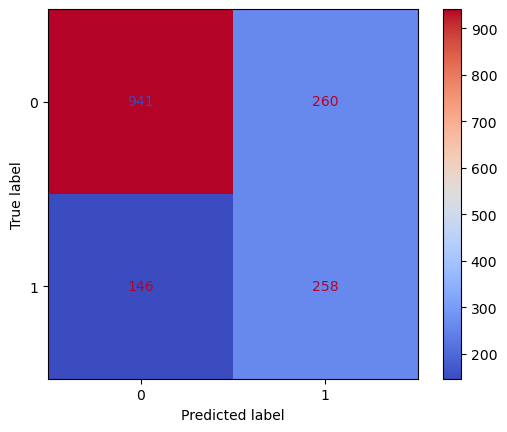

In [61]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_train_s2, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

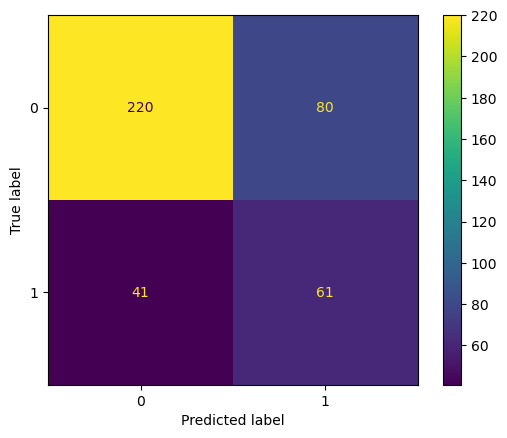

In [62]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_test_s2, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [63]:
scores=cross_val_score(s2,x,y,cv=3)
np.mean(scores)

0.7304434479322373

ADABOOST AND ITS MODEL EVALUATION

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [66]:
yhat3_train_ada=ada.predict(x_train)
yhat3_test_ada=ada.predict(x_test)

In [67]:
print(classification_report(y_train, yhat3_train_ada))
print()
print(classification_report(y_test, yhat3_test_ada))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1087
           1       0.93      0.88      0.91       518

    accuracy                           0.94      1605
   macro avg       0.94      0.93      0.93      1605
weighted avg       0.94      0.94      0.94      1605


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       261
           1       0.91      0.87      0.89       141

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.91       402
weighted avg       0.92      0.92      0.92       402



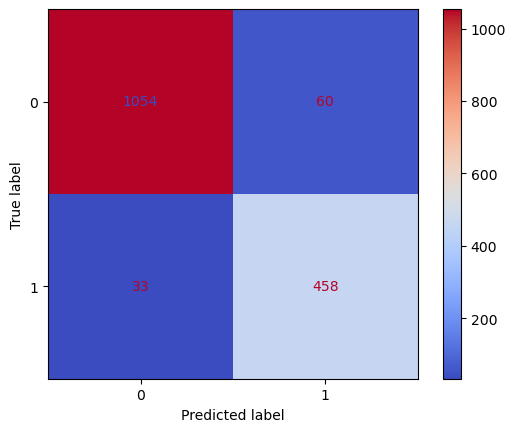

In [68]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat3_train_ada, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

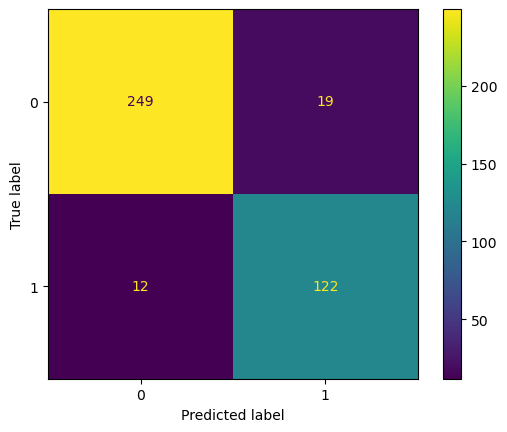

In [69]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat3_test_ada, y_test))
c_matrix.plot(cmap='viridis')

In [70]:
scores=cross_val_score(ada,x,y,cv=3)
np.mean(scores)

0.9202790234180368

CONCLUSION

AFTER USING DIFFERENT MODEL ON THE DATASET, THE BEST ACCURACY OF THE MODEL WERE AS FOLLOW:

LOGISTIC MODEL          73%

RANDOM FOREST           92%

SUPPORT VENDOR MACHINE  73%

ADA BOOST MODEL         92%